In [1]:
# usiamo project culo per lavorare e poi appena possibile ordiniamo tutto in file separati

In [1]:
from data_collection import *
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from datetime import datetime
from datetime import timedelta
from itertools import product
import pickle

In [2]:
# this returns OUR data headers
event_header, mention_header = headers()

In [4]:
# this reads the full event dataset (partial reading is possible)
#events = read_events()
# this reads the full mention dataset (partial reading is possible)
#mentions = read_mentions()

In [3]:
events = read_events(usecols = ['GlobalEventID', 'DATEADDED'])
mentions = read_mentions(usecols = ['GlobalEventID', 'MentionTimeDate'])
events.set_index("GlobalEventID", inplace=True)
mentions.set_index("GlobalEventID", inplace=True)

In [4]:
mentions


MentionTimeDate
GlobalEventID                    
719213357     2018-01-02 06:30:00
719213357     2018-01-02 06:30:00
613595974     2018-01-02 06:30:00
719218516     2018-01-02 06:30:00
719218517     2018-01-02 06:30:00
...                           ...
813403409     2018-12-31 21:45:00
813403410     2018-12-31 21:45:00
813403411     2018-12-31 21:45:00
813403412     2018-12-31 21:45:00
813403413     2018-12-31 21:45:00

[221183764 rows x 1 columns]

In [6]:
mentions = mentions[mentions.index.isin(events.index)]

In [7]:
mentions=mentions['MentionTimeDate']-events.loc[mentions.index]['DATEADDED']

In [8]:
mentions=mentions.loc[mentions.index.value_counts()>1]

MentionTimeDate

In [ ]:
GlobalEventID

In [9]:
mentions.groupby(level=0).min().value_counts()

0 days 00:00:00      17837013
-1 days +23:45:00        1130
-1 days +23:30:00         775
-1 days +23:00:00         320
-1 days +23:15:00         311
-1 days +21:30:00         169
-1 days +22:45:00         166
-1 days +22:30:00         140
-1 days +22:15:00         119
-1 days +21:45:00         117
-1 days +22:00:00         117
-1 days +20:30:00          90
-1 days +21:15:00          75
-1 days +21:00:00          46
-1 days +19:15:00          31
-1 days +20:45:00          26
-1 days +20:15:00          16
-1 days +20:00:00          15
-1 days +18:30:00          15
-1 days +16:45:00          15
-1 days +18:00:00          14
-1 days +18:45:00          12
-1 days +19:45:00          11
-1 days +17:15:00          10
-1 days +19:00:00          10
-1 days +18:15:00          10
-1 days +19:30:00           9
-1 days +16:15:00           6
-1 days +17:45:00           4
-1 days +17:00:00           3
-1 days +15:15:00           3
-1 days +14:45:00           3
-1 days +16:30:00           2
-1 days +1

In [7]:
#illuminati confirmed
mentions.drop(mentions[mentions < timedelta(days=0)].index.unique(), inplace=True)

# Distribution of Size :D

In [6]:
mentions_0_3_days=mentions[mentions <= timedelta(days = 3)]

In [7]:
mentions_0_3_days=mentions_0_3_days.groupby('GlobalEventID')

In [8]:
mentions_0_3_days = mentions_0_3_days.max() - mentions_0_3_days.min()

In [11]:
mentions_0_3_days = pd.DataFrame(mentions_0_3_days)

In [13]:
mentions_0_3_days=mentions_0_3_days[mentions_0_3_days > timedelta(days = 0)]

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

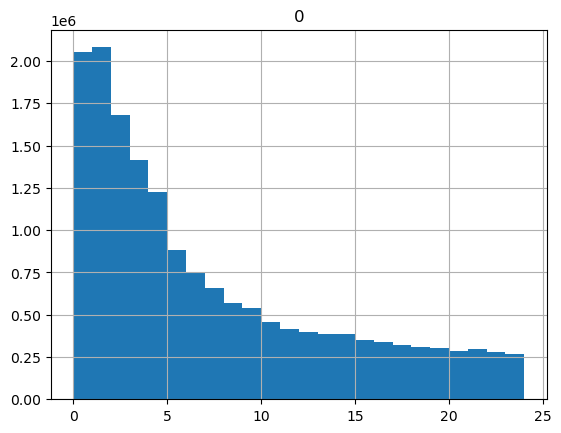

In [14]:
(mentions_0_3_days/pd.Timedelta(hours=1)).hist(range= [0,25], bins= [i for i in range(25)])

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

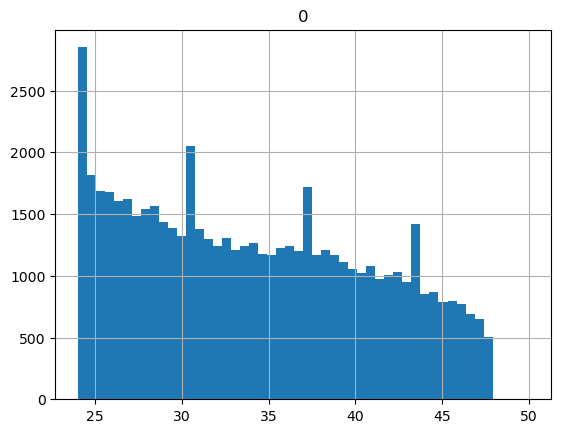

In [21]:
(mentions_0_3_days/pd.Timedelta(hours=1)).hist(range= [24,50], bins= 50)

# 3-10 days analisis, distribution of Cascade

In [16]:
mentions_3_10=mentions[(mentions >= timedelta(days = 3)) & (mentions <= timedelta(days = 10))]

In [17]:
mentions_3_10=mentions_3_10.groupby('GlobalEventID')

In [18]:
mentions_3_10 = mentions_3_10.max() - mentions_3_10.min()

In [23]:
mentions_3_10=mentions_3_10[mentions_3_10 > timedelta(days = 0)]

<AxesSubplot:>

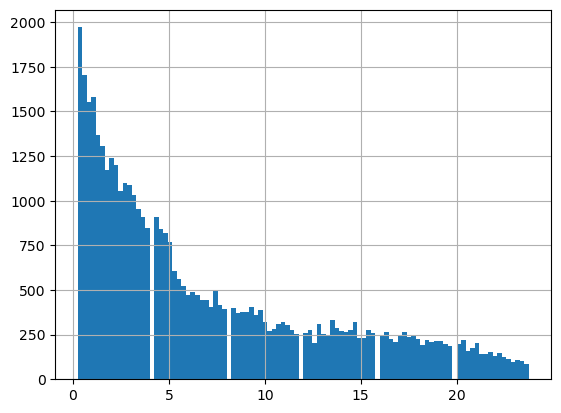

In [26]:
(mentions_3_10/pd.Timedelta(hours=1)).hist(bins=100)

# 3-10 days analisis, something


In [27]:
mentions_3_10_2=mentions[(mentions >= timedelta(days = 3)) & (mentions <= timedelta(days = 10))]

In [32]:
mentions_3_10_2=mentions_3_10_2-timedelta(days=5)

In [35]:
mentions_3_10_2=mentions_3_10_2.groupby('GlobalEventID')

<AxesSubplot:>

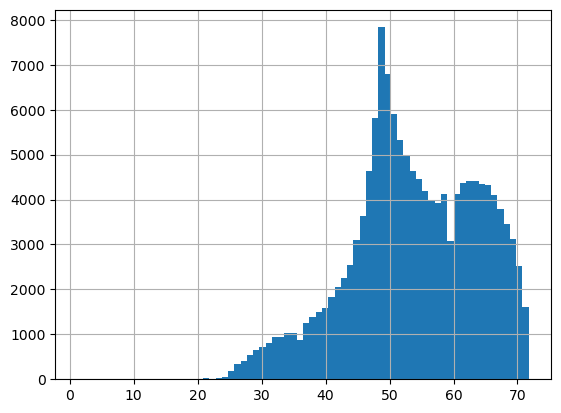

In [47]:
(mentions_3_10_2.min()/pd.Timedelta(hours=1)).hist(bins=72)

<AxesSubplot:>

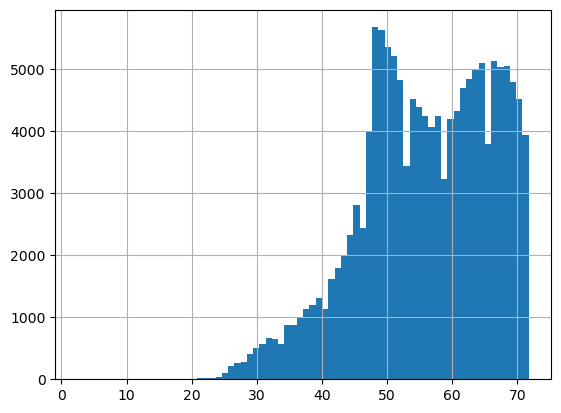

In [48]:
(mentions_3_10_2.max()/pd.Timedelta(hours=1)).hist(bins=72)

<AxesSubplot:>

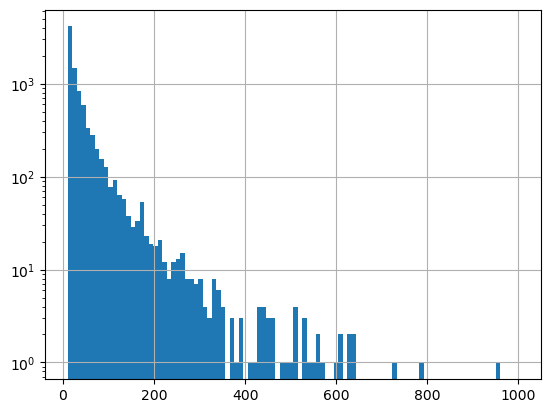

In [46]:
mentions_3_10_2.count().hist(range=(10,1000), log=True, bins=100)

# 20- 25 days analisis


In [49]:
mentions10_30=mentions[(mentions > timedelta(days = 10)) & (mentions <= timedelta(days = 33))]

In [51]:
mentions20_25=mentions10_30[(mentions10_30 > timedelta(days = 20)) & (mentions10_30 <= timedelta(days = 25))]

In [52]:
mentions20_25=mentions20_25-timedelta(days=21)

In [53]:
mentions20_25=mentions20_25.groupby('GlobalEventID')

In [60]:
len(mentions20_25)

570

<AxesSubplot:>

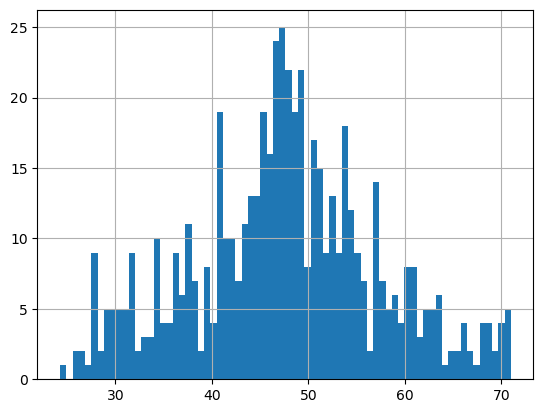

In [54]:
(mentions20_25.min()/pd.Timedelta(hours=1)).hist(bins=72)

<AxesSubplot:>

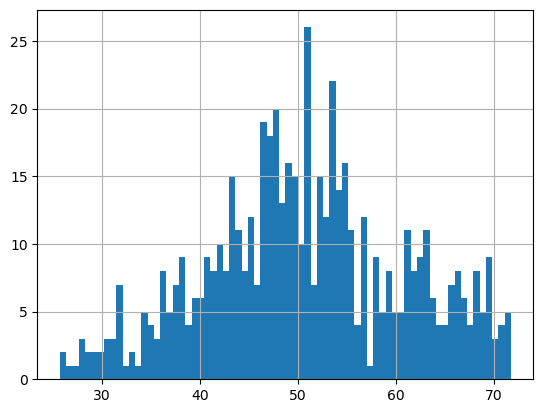

In [55]:
(mentions20_25.max()/pd.Timedelta(hours=1)).hist(bins=72)

<AxesSubplot:>

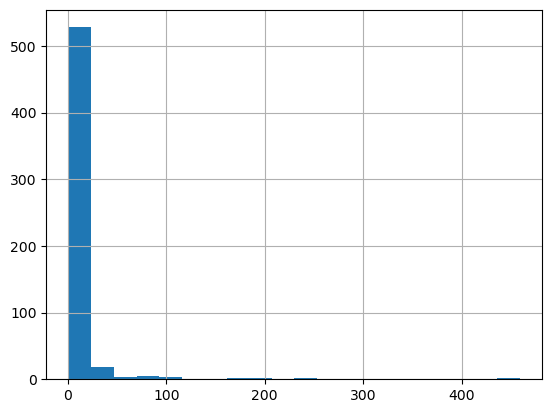

In [62]:
mentions20_25.count().hist(bins=20)

# 25-33 days analysis

In [63]:
mentions25_33=mentions10_30[(mentions10_30 > timedelta(days = 25)) & (mentions10_30 <= timedelta(days = 33))]

In [64]:
mentions25_33.min()

Timedelta('28 days 02:45:00')

In [76]:
mentions25_33.max().max()

Timedelta('2 days 23:45:00')

In [65]:
mentions25_33=mentions25_33-timedelta(days=28)

In [67]:
mentions25_33=mentions25_33.groupby('GlobalEventID')

In [68]:
len(mentions25_33)

72593

In [74]:
(mentions25_33.min()/pd.Timedelta(hours=1)).hist(bins=72)

<AxesSubplot:>

In [70]:
(mentions25_33.max()/pd.Timedelta(hours=1)).hist(bins=72)

<AxesSubplot:>

In [72]:
mentions25_33.count().hist(log=True, bins=20)

<AxesSubplot:>

# Seasonality of notions


In [94]:
mentions = mentions[mentions.index.isin(events.index)]

In [4]:
mentions = mentions.groupby('GlobalEventID')['MentionTimeDate'].max() - mentions.groupby('GlobalEventID')['MentionTimeDate'].min()

KeyboardInterrupt: 

In [99]:
mentions = mentions[(mentions <= timedelta(days = 50)) & (mentions >= timedelta(days = 1)) ]

In [101]:
mentions = pd.DataFrame(mentions)

In [106]:
#temp.assign(quante = reduced_mentions.loc[temp.index].index.value_counts()).sort_values('quante')

MentionTimeDate  quante
GlobalEventID                         
1022766290     6 days 21:45:00       2
1023332509    30 days 03:15:00       2
1026390454     1 days 12:15:00       2
1025236631     7 days 01:15:00       2
1023331702     6 days 09:15:00       2
...                        ...     ...
1024057882     7 days 21:45:00     506
1022154213     7 days 00:15:00     511
1023691291     7 days 21:00:00     539
1021841998    30 days 15:30:00     651
1022989130     7 days 22:45:00     695

[12682 rows x 2 columns]

In [41]:
mentions=mentions.reset_index()

<AxesSubplot:>

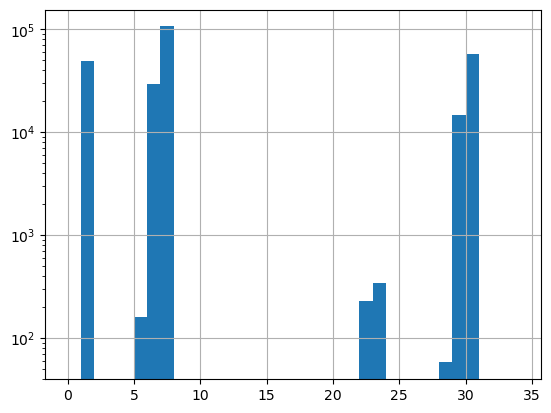

In [126]:
mentions['MentionTimeDate'].dt.days.hist(log=True, bins=[i for i in range(35)])

In [124]:
(mentions['MentionTimeDate']/pd.Timedelta(hours=1)).hist(range= [24*28,24*31], log=True)

<AxesSubplot:>

In [45]:
vie=mentions[mentions['MentionTimeDate'].isnull() == False]

In [79]:
with open(r"../data_utils/very_important_events.pickle", "wb") as f:
    pickle.dump(vie, f)

In [67]:
vie=vie.drop('DATEADDED', axis=1)

In [78]:
vie=pd.merge(vie, events.loc[vie['GlobalEventID']].reset_index(),  on= 'GlobalEventID')

In [146]:
def geturl(eventId, timestamp):
    # get the url
    _, url_export = string_to_url(timestamp.strftime('%Y%m%d%H%M%S'))

    resp_export = urlopen(url_export)

    full_event_header = load_pickle('../data_utils/full_event_header.pickle')
    full_mention_header = load_pickle('../data_utils/full_mention_header.pickle')

    # download the files and instantiate the unzipper
    zipfile_export = ZipFile(BytesIO(resp_export.read()))

    # unzip and preprocess
    new_dict = full_event_header.copy()
    new_dict['Actor1Geo_Lat'] = 'unicode'
    new_dict['Actor2Geo_Lat'] = 'unicode'
    new_dict['ActionGeo_Lat'] = 'unicode'
    new_dict['Actor1Geo_Long'] = 'unicode'
    new_dict['Actor2Geo_Long'] = 'unicode'
    new_dict['ActionGeo_Long'] = 'unicode'
    export = pd.read_csv(zipfile_export.open(zipfile_export.namelist()[0]), sep = '\t', names = full_event_header.keys(), dtype = new_dict)
    export['ActionGeo_Lat'] = export['ActionGeo_Lat'].str.replace('#','').astype('float32')
    export['ActionGeo_Long'] = export['ActionGeo_Long'].str.replace('#','').astype('float32')
    export.set_index("GlobalEventID", inplace=True)

    # close the unzipper instances
    zipfile_export.close()

    return(export.loc[eventId]['SOURCEURL'])

In [156]:
c=vie['GlobalEventID'].shape
c[0]

25

In [158]:
list_url=list()
for i in range(c[0]):
    list_url.append(geturl(vie['GlobalEventID'][i], vie['DATEADDED'][i]))

In [159]:
list_url

['http://www.winsfordguardian.co.uk/news/15799039.2017_IN_REVIEW__The_most_read_stories_in_Winsford_and_Middlewich/',
 'http://www.wfmynews2.com/news/local/3-arrested-stolen-guns-used-in-richard-childress-home-break-in-sheriff/504159997',
 'http://www.greensboro.com/ap/north_carolina/cooper-wants-lawmakers-to-address-teacher-funding-next-week/article_6fb119f6-1e4b-5f42-9cfa-c942f9b9d834.html',
 'https://www.huffingtonpost.com/entry/news-stories-missed-michael-wolff-book_us_5a4fc5c3e4b089e14dbaa4fd',
 'https://www.huffingtonpost.com/entry/news-stories-missed-michael-wolff-book_us_5a4fc5c3e4b089e14dbaa4fd',
 'https://www.thenews.com.pk/print/265185-north-korea-accepts-south-s-offer-of-talks-next-week',
 'http://www.newsnow.in/news/u-s-is-said-to-delay-payment-for-palestinians-after-trump-tweet',
 'https://www.belfasttelegraph.co.uk/news/knife-robbery-accused-gets-bail-to-have-a-paternity-test-36462832.html',
 'https://www.belfasttelegraph.co.uk/news/knife-robbery-accused-gets-bail-to-hav

# Creation of DF

In [8]:
# groupA = [timedelta(hours = 0), timedelta(hours = 24)]
# groupA2 = [timedelta(hours = 24), timedelta(hours = 50)]
# groupB = [timedelta(days = 5), timedelta(days = 9)]
# groupC = [timedelta(days = 20), timedelta(days = 25)]
# groupD = [timedelta(days = 28), timedelta(days = 33)]

In [3]:
groupA = [timedelta(hours = 0), timedelta(hours = 24)]
groupA2 = [timedelta(hours = 24), timedelta(hours = 50)]
groupB = [timedelta(hours = 50), timedelta(days = 9)]
groupC = [timedelta(days = 9), timedelta(days = 25)]
groupD = [timedelta(days = 25), timedelta(days = 33)]

In [40]:
boolA = mentions.between(*groupA, inclusive='left')
boolA2= mentions.between(*groupA2, inclusive='left')
boolB = mentions.between(*groupB, inclusive='left')
boolC = mentions.between(*groupC, inclusive='left')
boolD = mentions.between(*groupD, inclusive='left')

In [2]:
mins=["A_min", 'A2_min', 'B_min', 'C_min', 'D_min']
maxs=["A_max", 'A2_max', 'B_max', 'C_max', 'D_max']
counts=["A_count", 'A2_count', 'B_count', 'C_count', 'D_count']

In [42]:
df=mentions[boolA].groupby(level = 0).agg(A_min="min",A_max="max",A_count="count").join(
    [mentions[boolA2].groupby(level = 0).agg(A2_min="min",A2_max="max",A2_count="count")
       , mentions[boolB].groupby(level = 0).agg(B_min="min",B_max="max",B_count="count")
       , mentions[boolC].groupby(level = 0).agg(C_min="min",C_max="max",C_count="count")
       , mentions[boolD].groupby(level = 0).agg(D_min="min",D_max="max",D_count="count")], how='left')

In [43]:
for count in counts:
    df.loc[df[count].isna(), count]=int(0)

In [44]:
df[counts]=df[counts].astype("uint16")

In [45]:
df_day1=df.loc[(df[counts[1:]]>0).sum(axis=1)==0][['A_min', 'A_max', 'A_count']]

In [46]:
df=df.loc[(df[counts[1:]]>0).sum(axis=1)>0]

In [47]:
df.loc[:, mins+maxs]=df.loc[:, mins+maxs].apply(lambda x: x/timedelta(minutes=15) )

In [48]:
df[mins+maxs]=df[mins+maxs].astype("float32")

In [49]:
df.to_csv('../data/group_DF.tsv', sep='\t',header=True, index=True)

In [51]:
df_day1 = df_day1[df_day1['A_count']>1]

In [52]:
df_day1.loc[:, ['A_min', 'A_max']]=df_day1.loc[:,['A_min', 'A_max']].apply(lambda x: x/timedelta(minutes=15) )

In [53]:
df_day1[['A_min', 'A_max']]=df_day1[['A_min', 'A_max']].astype("float32")

In [55]:
df_day1.to_csv('../data/group_DF_day1.tsv', sep='\t',header=True, index=True)

In [4]:
def read_processed(usecols = None, skiprows=None, skipfooter=0, nrows=None, iterator=False, chunksize=None, **kwargs):
    '''
    usecols:     list-like or callable, optional
                 Return a subset of the columnsIf list-like, all elements must either be positional (i.e. integer indices into the document columns) or strings that correspond to column names provided either by the user in names or inferred from the document header row(s).
    skiprows:    list-like, int or callable, optional
                 Line numbers to skip (0-indexed) or number of lines to skip (int) at the start of the file.
                 If callable, the callable function will be evaluated against the row indices, returning True if the row should be skipped and False otherwise. An example of a valid callable argument would be lambda x: x in [0, 2].
 
    skipfooter:  int, default 0
                 Number of lines at bottom of file to skip (Unsupported with engine=’c’).
 
    nrows:       int, optional
                 Number of rows of file to read. Useful for reading pieces of large files.
 
    iterator:    bool, default False
                 Return TextFileReader object for iteration or getting chunks with get_chunk().
 
    chunksize:   int, optional
                 Return TextFileReader object for iteration. See the IO Tools docs for more information on iterator and chunksize.
    '''
    
    mins=["A_min", 'A2_min', 'B_min', 'C_min', 'D_min']
    maxs=["A_max", 'A2_max', 'B_max', 'C_max', 'D_max']
    counts=["A_count", 'A2_count', 'B_count', 'C_count', 'D_count']
    
    processed_header = load_pickle('../data_utils/processed_header.pickle')
    df = pd.read_csv('../data/group_DF.tsv', sep = '\t' , dtype = processed_header, index_col=0, usecols = usecols, skiprows=skiprows, skipfooter=skipfooter, nrows=nrows, iterator=iterator, chunksize=chunksize, **kwargs)
    df.loc[:, mins+maxs]=df.loc[:, mins+maxs].apply(lambda x: x*timedelta(minutes=15) )
    
    return(df)

def read_processed_day1(usecols = None, skiprows=None, skipfooter=0, nrows=None, iterator=False, chunksize=None, **kwargs):
    '''
    usecols:     list-like or callable, optional
                 Return a subset of the columnsIf list-like, all elements must either be positional (i.e. integer indices into the document columns) or strings that correspond to column names provided either by the user in names or inferred from the document header row(s).
    skiprows:    list-like, int or callable, optional
                 Line numbers to skip (0-indexed) or number of lines to skip (int) at the start of the file.
                 If callable, the callable function will be evaluated against the row indices, returning True if the row should be skipped and False otherwise. An example of a valid callable argument would be lambda x: x in [0, 2].
 
    skipfooter:  int, default 0
                 Number of lines at bottom of file to skip (Unsupported with engine=’c’).
 
    nrows:       int, optional
                 Number of rows of file to read. Useful for reading pieces of large files.
 
    iterator:    bool, default False
                 Return TextFileReader object for iteration or getting chunks with get_chunk().
 
    chunksize:   int, optional
                 Return TextFileReader object for iteration. See the IO Tools docs for more information on iterator and chunksize.
    '''
    
    processed_header = load_pickle('../data_utils/processed_header_day1.pickle')
    df = pd.read_csv('../data/group_DF_day1.tsv', sep = '\t' , dtype = processed_header, index_col=0, usecols = usecols, skiprows=skiprows, skipfooter=skipfooter, nrows=nrows, iterator=iterator, chunksize=chunksize, **kwargs)
    df.loc[:,['A_min', 'A_max']]=df.loc[:, ['A_min', 'A_max']].apply(lambda x: x*timedelta(minutes=15) )
    
    return(df)



# Analysis all together Day1

In [5]:
mins=["A_min", 'A2_min', 'B_min', 'C_min', 'D_min']
maxs=["A_max", 'A2_max', 'B_max', 'C_max', 'D_max']
counts=["A_count", 'A2_count', 'B_count', 'C_count', 'D_count']

In [6]:
df_day1=read_processed_day1()
# remember to remove A_min in the dataset
# it's just zeros (obv..)
# and rename the columns in the tsv
df_day1.drop('A_min', axis = 1, inplace = True)
df_day1.rename(columns={"A_max": "last_mention", 'A_count':'count'}, inplace = True)

In [7]:
df_day1.sort_values(by = 'last_mention', inplace = True)
df_day1['numbering'] = np.arange(len(df_day1))

In [67]:
df_day1['last_hour'] = df_day1['last_mention']/timedelta(minutes = 15)

In [21]:
(df_day1.last_mention/timedelta(hours=1)).hist()

<AxesSubplot:>

In [47]:
df_day1['count'].hist(log = True)#, bins = 10, range = [2000,3000])

<AxesSubplot:>

<AxesSubplot:xlabel='numbering', ylabel='last_hour'>

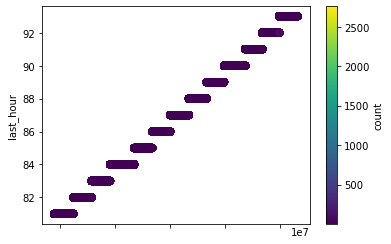

In [80]:
df_day1.loc[(df_day1['last_hour']>80)&(df_day1['last_hour']<94)].plot.scatter(y="last_hour", x='numbering', c="count",cmap="viridis", s=50)

<AxesSubplot:xlabel='count', ylabel='last_hour'>

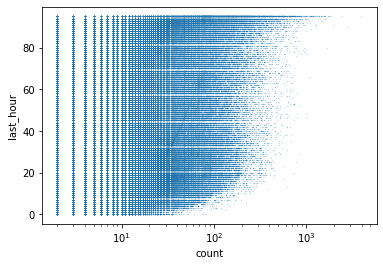

In [68]:
df_day1.iloc[::9].plot.scatter(y="last_hour", x="count", logx = True, s=0.01)

In [71]:
df_day1.last_hour.value_counts()[20:40]

20.0    270888
21.0    213009
22.0    200525
24.0    196708
23.0    195881
25.0    186962
26.0    181553
27.0    178566
28.0    171428
29.0    164566
30.0    162593
31.0    153874
33.0    146689
32.0    143594
35.0    140236
37.0    139787
39.0    138886
34.0    137315
36.0    133124
38.0    126810
40.0    120332
Name: last_hour, dtype: int64

# comparative group analysis

In [4]:
mins=["A_min", 'A2_min', 'B_min', 'C_min', 'D_min']
maxs=["A_max", 'A2_max', 'B_max', 'C_max', 'D_max']
counts=["A_count", 'A2_count', 'B_count', 'C_count', 'D_count']

In [7]:
df=read_processed()

In [8]:
df

A_min           A_max  A_count          A2_min          A2_max  \
GlobalEventID                                                                   
719024898     0 days 0 days 23:45:00      140             NaT             NaT   
719024938     0 days 0 days 23:45:00       66 1 days 09:30:00 1 days 09:30:00   
719024947     0 days 0 days 19:00:00        2             NaT             NaT   
719024948     0 days 0 days 00:00:00        2 1 days 00:00:00 1 days 06:30:00   
719024953     0 days 0 days 23:45:00       39             NaT             NaT   
...              ...             ...      ...             ...             ...   
813183236     0 days 0 days 02:45:00        2 1 days 01:00:00 1 days 01:00:00   
813189972     0 days 0 days 00:00:00        1 1 days 00:45:00 1 days 00:45:00   
813190065     0 days 0 days 00:00:00        1 1 days 00:45:00 1 days 00:45:00   
813200692     0 days 0 days 02:45:00        2 1 days 02:15:00 1 days 02:15:00   
813206189     0 days 0 days 04:45:00        3 1 days 01:30:00 1 days 01:30:00   

               A2_count           B_min           B_max  B_count C_min C_max  \
GlobalEventID                                                                  
719024898             0             NaT             NaT        0   NaT   NaT   
719024938             1             NaT             NaT        0   NaT   NaT   
719024947             0 7 days 14:45:00 7 days 14:45:00        1   NaT   NaT   
719024948            13 7 days 01:15:00 7 days 01:15:00        1   NaT   NaT   
719024953             0 7 days 16:30:00 7 days 20:15:00        2   NaT   NaT   
...                 ...             ...             ...      ...   ...   ...   
813183236             1             NaT             NaT        0   NaT   NaT   
813189972             1             NaT             NaT        0   NaT   NaT   
813190065             1             NaT             NaT        0   NaT   NaT   
813200692             1             NaT             NaT        0   NaT   NaT   
813206189             1             NaT             NaT        0   NaT   NaT   

               C_count            D_min            D_max  D_count  
GlobalEventID                                                      
719024898            0 30 days 01:45:00 30 days 06:45:00        2  
719024938            0              NaT              NaT        0  
719024947            0              NaT              NaT        0  
719024948            0              NaT              NaT        0  
719024953            0              NaT              NaT        0  
...                ...              ...              ...      ...  
813183236            0              NaT              NaT        0  
813189972            0              NaT              NaT        0  
813190065            0              NaT              NaT        0  
813200692            0              NaT              NaT        0  
813206189            0              NaT              NaT        0  

[258873 rows x 15 columns]

<AxesSubplot:>

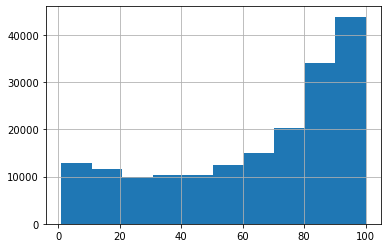

In [99]:
(df.A_max/timedelta(minutes=15)).hist(range=[1,100])

In [98]:
(df.A_max/timedelta(minutes = 15)).value_counts().sort_index()

0.0     78318
1.0      1484
2.0      1441
3.0      1271
4.0      1320
        ...  
91.0     5346
92.0     6246
93.0     7810
94.0     9980
95.0    14428
Name: A_max, Length: 96, dtype: int64

In [ ]:
df.loc[df.A_max/timedelta(minutes = 15) == 0].A_count.value_counts()

In [128]:
axs[0][0]

<AxesSubplot:>

[]

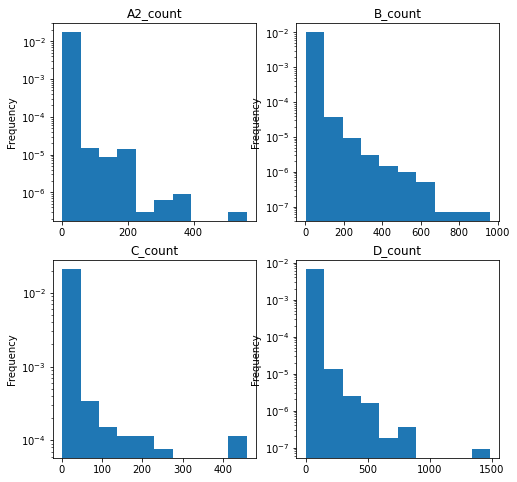

In [133]:
nrow, ncol = (2,2)
fig, axs = plt.subplots(nrow, ncol)
fig.set_size_inches(8,8)

for row in range(nrow):
    for col in range(ncol):
        col_name = counts[ncol*row + col+1]
        df[col_name].loc[df[col_name]>0].plot(kind='hist',subplots=False,title=col_name, log = True, ax = axs[row][col], density = True, ylabel = '')

plt.plot()

[]

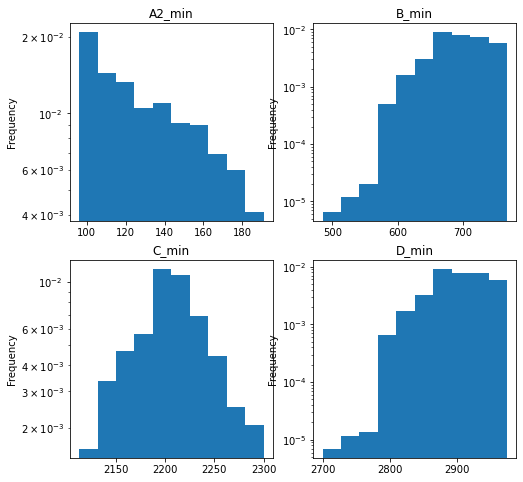

In [138]:
nrow, ncol = (2,2)
fig, axs = plt.subplots(nrow, ncol)
fig.set_size_inches(8,8)

for row in range(nrow):
    for col in range(ncol):
        col_name = mins[ncol*row + col+1]
        (df[col_name].loc[np.logical_not(df[col_name].isna())]/timedelta(minutes = 15)).plot(kind='hist',subplots=False,title=col_name, log = True, ax = axs[row][col], density = True, ylabel = '')

plt.plot()

[]

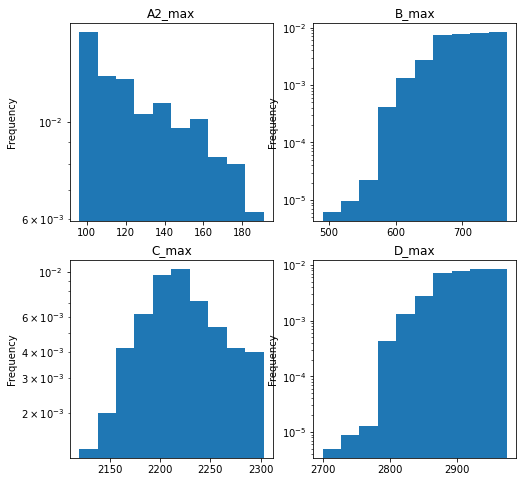

In [139]:
nrow, ncol = (2,2)
fig, axs = plt.subplots(nrow, ncol)
fig.set_size_inches(8,8)

for row in range(nrow):
    for col in range(ncol):
        col_name = maxs[ncol*row + col+1]
        (df[col_name].loc[np.logical_not(df[col_name].isna())]/timedelta(minutes = 15)).plot(kind='hist',subplots=False,title=col_name, log = True, ax = axs[row][col], density = True, ylabel = '')

plt.plot()

In [148]:
nrow, ncol = (2,2)
fig, axs = plt.subplots(nrow, ncol)
fig.set_size_inches(8,8)

for row in range(nrow):
    for col in range(ncol):
        col_name = counts[ncol*row + col+1]
        df.loc[df.A2_count>0][col_name].loc[df[col_name]>0].plot(kind='hist',subplots=False,title=col_name, log = True, ax = axs[row][col], density = True, ylabel = '')

plt.plot()

[]

[]

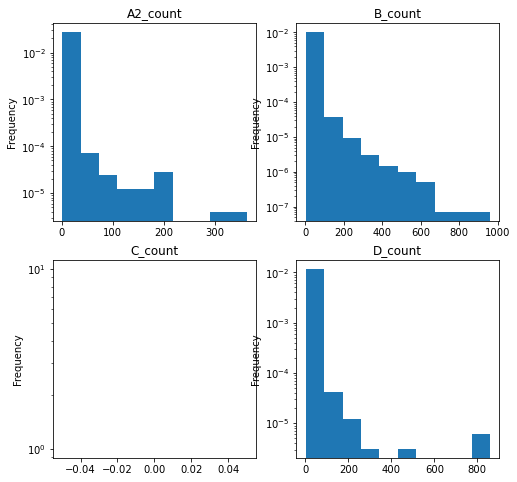

In [149]:
nrow, ncol = (2,2)
fig, axs = plt.subplots(nrow, ncol)
fig.set_size_inches(8,8)

for row in range(nrow):
    for col in range(ncol):
        col_name = counts[ncol*row + col+1]
        df.loc[df.B_count>0][col_name].loc[df[col_name]>0].plot(kind='hist',subplots=False,title=col_name, log = True, ax = axs[row][col], density = True, ylabel = '')

plt.plot()

[]

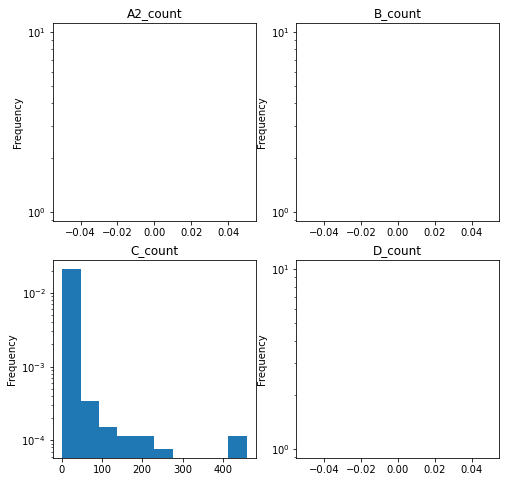

In [150]:
nrow, ncol = (2,2)
fig, axs = plt.subplots(nrow, ncol)
fig.set_size_inches(8,8)

for row in range(nrow):
    for col in range(ncol):
        col_name = counts[ncol*row + col+1]
        df.loc[df.C_count>0][col_name].loc[df[col_name]>0].plot(kind='hist',subplots=False,title=col_name, log = True, ax = axs[row][col], density = True, ylabel = '')

plt.plot()

[]

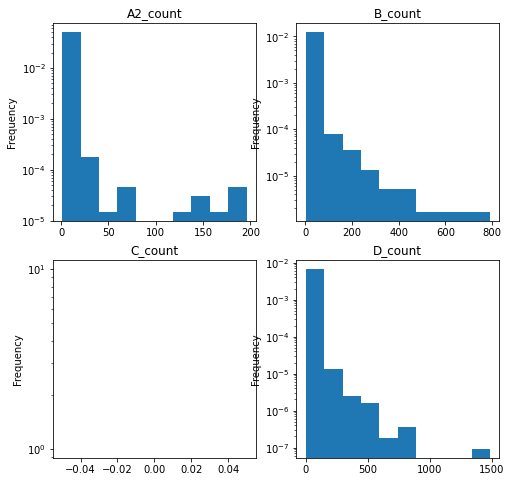

In [151]:
nrow, ncol = (2,2)
fig, axs = plt.subplots(nrow, ncol)
fig.set_size_inches(8,8)

for row in range(nrow):
    for col in range(ncol):
        col_name = counts[ncol*row + col+1]
        df.loc[df.D_count>0][col_name].loc[df[col_name]>0].plot(kind='hist',subplots=False,title=col_name, log = True, ax = axs[row][col], density = True, ylabel = '')

plt.plot()

In [ ]:
mins=["A_min", 'A2_min', 'B_min', 'C_min', 'D_min']
maxs=["A_max", 'A2_max', 'B_max', 'C_max', 'D_max']
counts=["A_count", 'A2_count', 'B_count', 'C_count', 'D_count']

[]

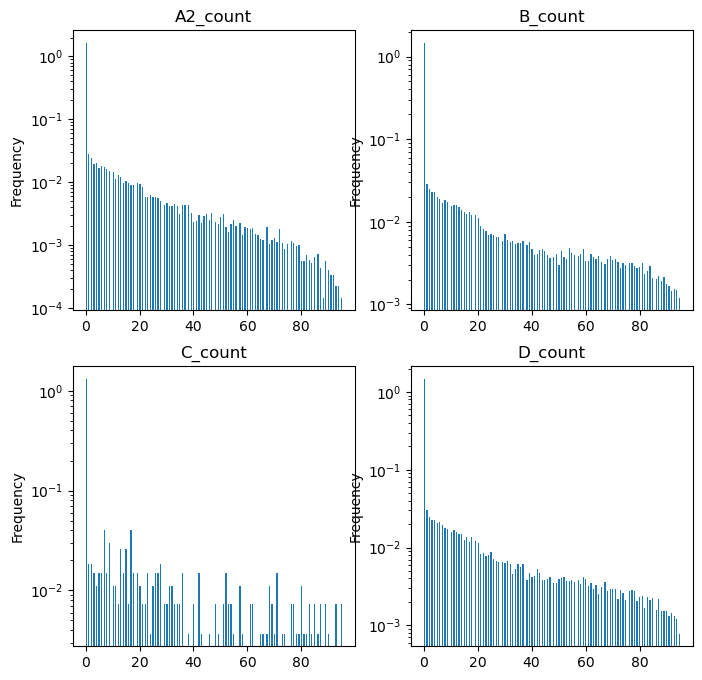

In [22]:
nrow, ncol = (2,2)
fig, axs = plt.subplots(nrow, ncol)
fig.set_size_inches(8,8)

for row in range(nrow):
    for col in range(ncol):
        col_name=counts[ncol*row + col+1]
        col_name_min= mins[ncol*row + col+1]
        col_name_max= maxs[ncol*row + col+1]
        ((df[col_name_max]-df[col_name_min]).loc[df[col_name]>-1]/timedelta(minutes = 15)).plot(kind='hist',
        subplots=False,title=col_name, log = True, ax = axs[row][col], density = True, ylabel = '', bins=200)

plt.plot()

In [35]:
A=(((df['D_max']-df['D_min']).loc[df['D_count']>0]/timedelta(minutes = 15)).value_counts())/(((df['D_max']-df['D_min']).loc[df['D_count']>0]/timedelta(minutes = 15)).value_counts()).sum()
B=((df['B_max']-df['B_min']).loc[df['B_count']>0]/timedelta(minutes = 15)).value_counts()/((df['B_max']-df['B_min']).loc[df['B_count']>0]/timedelta(minutes = 15)).value_counts().sum()

In [41]:
np.sqrt(((A-B)**2).sum())/96

5.720368742506858e-05

In [ ]:
df.loc()

In [9]:
df.loc[(df["B_count"] > 0) & (df["D_count"] > 0)]

A_min           A_max  A_count          A2_min          A2_max  \
GlobalEventID                                                                   
719025098     0 days 0 days 00:00:00        1             NaT             NaT   
719025105     0 days 0 days 00:00:00        2             NaT             NaT   
719025107     0 days 0 days 00:00:00        1             NaT             NaT   
719025388     0 days 0 days 23:45:00      126 1 days 11:00:00 1 days 19:15:00   
719026854     0 days 0 days 23:30:00       87             NaT             NaT   
...              ...             ...      ...             ...             ...   
806518198     0 days 0 days 15:00:00        2             NaT             NaT   
806754471     0 days 0 days 00:00:00        1             NaT             NaT   
806754650     0 days 0 days 23:45:00      959             NaT             NaT   
806755475     0 days 0 days 23:45:00      239 1 days 08:15:00 1 days 23:45:00   
806759777     0 days 0 days 00:00:00        1             NaT             NaT   

               A2_count           B_min           B_max  B_count C_min C_max  \
GlobalEventID                                                                  
719025098             0 7 days 14:15:00 7 days 19:30:00        2   NaT   NaT   
719025105             0 7 days 12:15:00 7 days 14:15:00        3   NaT   NaT   
719025107             0 7 days 16:30:00 7 days 16:30:00        1   NaT   NaT   
719025388             3 7 days 02:45:00 7 days 16:45:00        3   NaT   NaT   
719026854             0 7 days 00:00:00 7 days 23:15:00       61   NaT   NaT   
...                 ...             ...             ...      ...   ...   ...   
806518198             0 6 days 19:30:00 6 days 23:45:00        3   NaT   NaT   
806754471             0 7 days 02:30:00 7 days 02:30:00        1   NaT   NaT   
806754650             0 7 days 05:15:00 7 days 05:15:00        1   NaT   NaT   
806755475             7 7 days 08:45:00 7 days 08:45:00        1   NaT   NaT   
806759777             0 7 days 05:00:00 7 days 05:00:00        1   NaT   NaT   

               C_count            D_min            D_max  D_count  
GlobalEventID                                                      
719025098            0 30 days 23:00:00 30 days 23:00:00        1  
719025105            0 30 days 23:00:00 30 days 23:00:00        1  
719025107            0 30 days 00:45:00 30 days 02:45:00        4  
719025388            0 30 days 19:30:00 30 days 19:30:00        1  
719026854            0 30 days 00:45:00 30 days 21:15:00        6  
...                ...              ...              ...      ...  
806518198            0 30 days 09:45:00 30 days 09:45:00        1  
806754471            0 30 days 12:30:00 30 days 12:30:00        1  
806754650            0 30 days 21:15:00 30 days 21:15:00        1  
806755475            0 30 days 19:00:00 30 days 19:00:00        1  
806759777            0 30 days 21:00:00 30 days 21:00:00        1  

[7491 rows x 15 columns]

Diocane
Giacchè i 2 gruppi B e D hanno pochi elementi in comune (RM) il fatto che le loro distribuzioni siano simili è una proprietà di gruppo e non degli elementi che lo compongono

<AxesSubplot:>

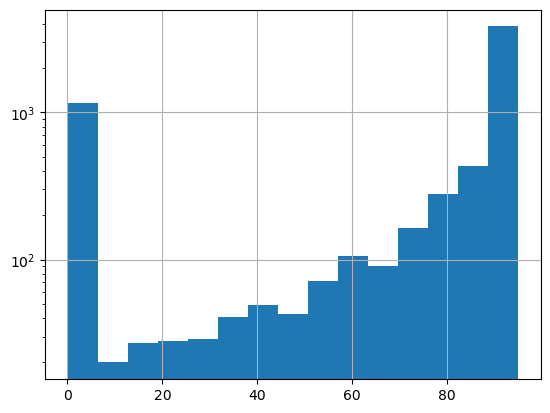

In [38]:
(df.loc[(df["B_count"]  + df["D_count"] > 0 ) & df['A2_count'] >0].A_max/timedelta(minutes = 15)).hist(log=True , bins=15)

In [39]:
df['Z_count']=df['A_count']+df['A2_count']

In [41]:
df['Z_max']=df[['A_max' , 'A2_max']].max(axis=1)

In [43]:
(df['Z_max']/timedelta(minutes=15)).hist(log=True, bins= 192)

<AxesSubplot:>

In [36]:
(df.loc[(df["B_count"]> 0)].B_max/timedelta(minutes = 15)).hist(log=True, bins=15)

<AxesSubplot:>

In [46]:
800/96

8.333333333333334

<AxesSubplot:>

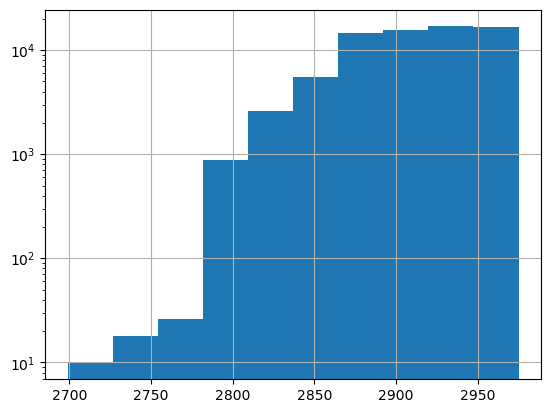

In [30]:
(df.loc[(df["D_count"]> 0)].D_max/timedelta(minutes = 15)).hist(log=True)

In [50]:
df['D_max'].max()-df['D_min'].min()

Timedelta('2 days 21:00:00')

In [49]:
df['B_max'].max()-df['B_min'].min()

Timedelta('2 days 22:30:00')

# O stamo a fa'

In [3]:
df=read_processed()

In [5]:
C=df.index

In [6]:
C

Int64Index([719024898, 719024938, 719024947, 719024948, 719024953, 719024982,
            719025009, 719025021, 719025090, 719025098,
            ...
            813154957, 813158804, 813165108, 813165626, 813165658, 813183236,
            813189972, 813190065, 813200692, 813206189],
           dtype='int64', name='GlobalEventID', length=258873)

In [8]:
events=read_events(usecols=["GlobalEventID"])

In [10]:
namelist=events.GlobalEventID

In [15]:
events=read_events(skiprows= lambda x: not namelist[x] in(df.index))

In [ ]:
events.set_index("GlobalEventID", inplace=True)

In [ ]:
events = events[events.index.isin(df.index)]

In [16]:
events

GlobalEventID  IsRootEvent EventCode EventBaseCode EventRootCode  \
0           719218587            0       111           111            11   
1           719219395            0       043           043            04   
2           719219484            1       111           111            11   
3           719220362            1       042           042            04   
4           719220425            0       010           010            01   
...               ...          ...       ...           ...           ...   
258868      813142686            1       051           051            05   
258869      813142699            1       042           042            04   
258870      813144771            1       111           111            11   
258871      813146020            0       010           010            01   
258872      813147349            0       010           010            01   

        QuadClass  GoldsteinScale  NumMentions  NumSources  NumArticles  \
0               3            -2.0           20           2           20   
1               1             2.8            6           1            6   
2               3            -2.0            4           1            4   
3               1             1.9            8           1            8   
4               1             0.0            4           1            4   
...           ...             ...          ...         ...          ...   
258868          1             3.4            4           1            4   
258869          1             1.9            1           1            1   
258870          3            -2.0           10           1           10   
258871          1             0.0            5           1            5   
258872          1             0.0            2           1            2   

         AvgTone  ActionGeo_Type  \
0      -3.065768               1   
1      -2.611712               1   
2      -0.725953               2   
3       5.660378               2   
4      -3.386004               4   
...          ...             ...   
258868  1.628106               4   
258869 -0.386847               4   
258870  5.577689               0   
258871 -6.378601               4   
258872 -0.474383               4   

                                     ActionGeo_FullName ActionGeo_CountryCode  \
0                                                Russia                    RS   
1                                          Saudi Arabia                    SA   
2                                  Texas, United States                    US   
3                               Missouri, United States                    US   
4                          Bendigo, Victoria, Australia                    AS   
...                                                 ...                   ...   
258868                          Sokoto, Sokoto, Nigeria                    NI   
258869                          Sokoto, Sokoto, Nigeria                    NI   
258870                                              NaN                   NaN   
258871               Sydney, New South Wales, Australia                    AS   
258872  Abuja, Abuja Federal Capital Territory, Nigeria                    NI   

        ActionGeo_Lat  ActionGeo_Long           DATEADDED  
0            60.00000       100.00000 2018-01-02 06:30:00  
1            25.00000        45.00000 2018-01-02 06:30:00  
2            31.10600       -97.64750 2018-01-02 06:30:00  
3            38.46230       -92.30200 2018-01-02 06:45:00  
4           -36.75820       144.28000 2018-01-02 06:45:00  
...               ...             ...                 ...  
258868       13.06090         5.23902 2018-12-30 04:00:00  
258869       13.06090         5.23902 2018-12-30 04:00:00  
258870            NaN             NaN 2018-12-30 04:30:00  
258871      -33.88330       151.21700 2018-12-30 04:45:00  
258872        9.08333         7.53333 2018-12-30 05:00:00  

[258873 rows x 17 columns]

In [17]:
events.to_csv('../data/giorgio.tsv', sep='\t',header=True, index=True)

In [6]:
giorgio=pd.read_csv('../data/giorgio.tsv', sep='\t')

In [8]:
df=read_processed()

In [9]:
df

A_min           A_max  A_count          A2_min          A2_max  \
GlobalEventID                                                                   
719024898     0 days 0 days 23:45:00      140             NaT             NaT   
719024938     0 days 0 days 23:45:00       66 1 days 09:30:00 1 days 09:30:00   
719024947     0 days 0 days 19:00:00        2             NaT             NaT   
719024948     0 days 0 days 00:00:00        2 1 days 00:00:00 1 days 06:30:00   
719024953     0 days 0 days 23:45:00       39             NaT             NaT   
...              ...             ...      ...             ...             ...   
813183236     0 days 0 days 02:45:00        2 1 days 01:00:00 1 days 01:00:00   
813189972     0 days 0 days 00:00:00        1 1 days 00:45:00 1 days 00:45:00   
813190065     0 days 0 days 00:00:00        1 1 days 00:45:00 1 days 00:45:00   
813200692     0 days 0 days 02:45:00        2 1 days 02:15:00 1 days 02:15:00   
813206189     0 days 0 days 04:45:00        3 1 days 01:30:00 1 days 01:30:00   

               A2_count           B_min           B_max  B_count C_min C_max  \
GlobalEventID                                                                  
719024898             0             NaT             NaT        0   NaT   NaT   
719024938             1             NaT             NaT        0   NaT   NaT   
719024947             0 7 days 14:45:00 7 days 14:45:00        1   NaT   NaT   
719024948            13 7 days 01:15:00 7 days 01:15:00        1   NaT   NaT   
719024953             0 7 days 16:30:00 7 days 20:15:00        2   NaT   NaT   
...                 ...             ...             ...      ...   ...   ...   
813183236             1             NaT             NaT        0   NaT   NaT   
813189972             1             NaT             NaT        0   NaT   NaT   
813190065             1             NaT             NaT        0   NaT   NaT   
813200692             1             NaT             NaT        0   NaT   NaT   
813206189             1             NaT             NaT        0   NaT   NaT   

               C_count            D_min            D_max  D_count  
GlobalEventID                                                      
719024898            0 30 days 01:45:00 30 days 06:45:00        2  
719024938            0              NaT              NaT        0  
719024947            0              NaT              NaT        0  
719024948            0              NaT              NaT        0  
719024953            0              NaT              NaT        0  
...                ...              ...              ...      ...  
813183236            0              NaT              NaT        0  
813189972            0              NaT              NaT        0  
813190065            0              NaT              NaT        0  
813200692            0              NaT              NaT        0  
813206189            0              NaT              NaT        0  

[258873 rows x 15 columns]

In [28]:
c=df.loc[df['A2_count']> 0]

In [29]:
c

A_min           A_max  A_count          A2_min          A2_max  \
GlobalEventID                                                                   
719024938     0 days 0 days 23:45:00       66 1 days 09:30:00 1 days 09:30:00   
719024948     0 days 0 days 00:00:00        2 1 days 00:00:00 1 days 06:30:00   
719024982     0 days 0 days 00:00:00        1 1 days 05:45:00 1 days 05:45:00   
719025009     0 days 0 days 23:45:00       87 1 days 03:15:00 1 days 12:15:00   
719025388     0 days 0 days 23:45:00      126 1 days 11:00:00 1 days 19:15:00   
...              ...             ...      ...             ...             ...   
813183236     0 days 0 days 02:45:00        2 1 days 01:00:00 1 days 01:00:00   
813189972     0 days 0 days 00:00:00        1 1 days 00:45:00 1 days 00:45:00   
813190065     0 days 0 days 00:00:00        1 1 days 00:45:00 1 days 00:45:00   
813200692     0 days 0 days 02:45:00        2 1 days 02:15:00 1 days 02:15:00   
813206189     0 days 0 days 04:45:00        3 1 days 01:30:00 1 days 01:30:00   

               A2_count           B_min           B_max  B_count C_min C_max  \
GlobalEventID                                                                  
719024938             1             NaT             NaT        0   NaT   NaT   
719024948            13 7 days 01:15:00 7 days 01:15:00        1   NaT   NaT   
719024982             2 7 days 06:45:00 7 days 06:45:00        2   NaT   NaT   
719025009             2             NaT             NaT        0   NaT   NaT   
719025388             3 7 days 02:45:00 7 days 16:45:00        3   NaT   NaT   
...                 ...             ...             ...      ...   ...   ...   
813183236             1             NaT             NaT        0   NaT   NaT   
813189972             1             NaT             NaT        0   NaT   NaT   
813190065             1             NaT             NaT        0   NaT   NaT   
813200692             1             NaT             NaT        0   NaT   NaT   
813206189             1             NaT             NaT        0   NaT   NaT   

               C_count            D_min            D_max  D_count  
GlobalEventID                                                      
719024938            0              NaT              NaT        0  
719024948            0              NaT              NaT        0  
719024982            0              NaT              NaT        0  
719025009            0              NaT              NaT        0  
719025388            0 30 days 19:30:00 30 days 19:30:00        1  
...                ...              ...              ...      ...  
813183236            0              NaT              NaT        0  
813189972            0              NaT              NaT        0  
813190065            0              NaT              NaT        0  
813200692            0              NaT              NaT        0  
813206189            0              NaT              NaT        0  

[57845 rows x 15 columns]

In [15]:
giorgio.set_index("GlobalEventID", inplace=True)

KeyError: "None of ['GlobalEventID'] are in the columns"

In [23]:
corr1=giorgio[giorgio.index.isin(a.index)].corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

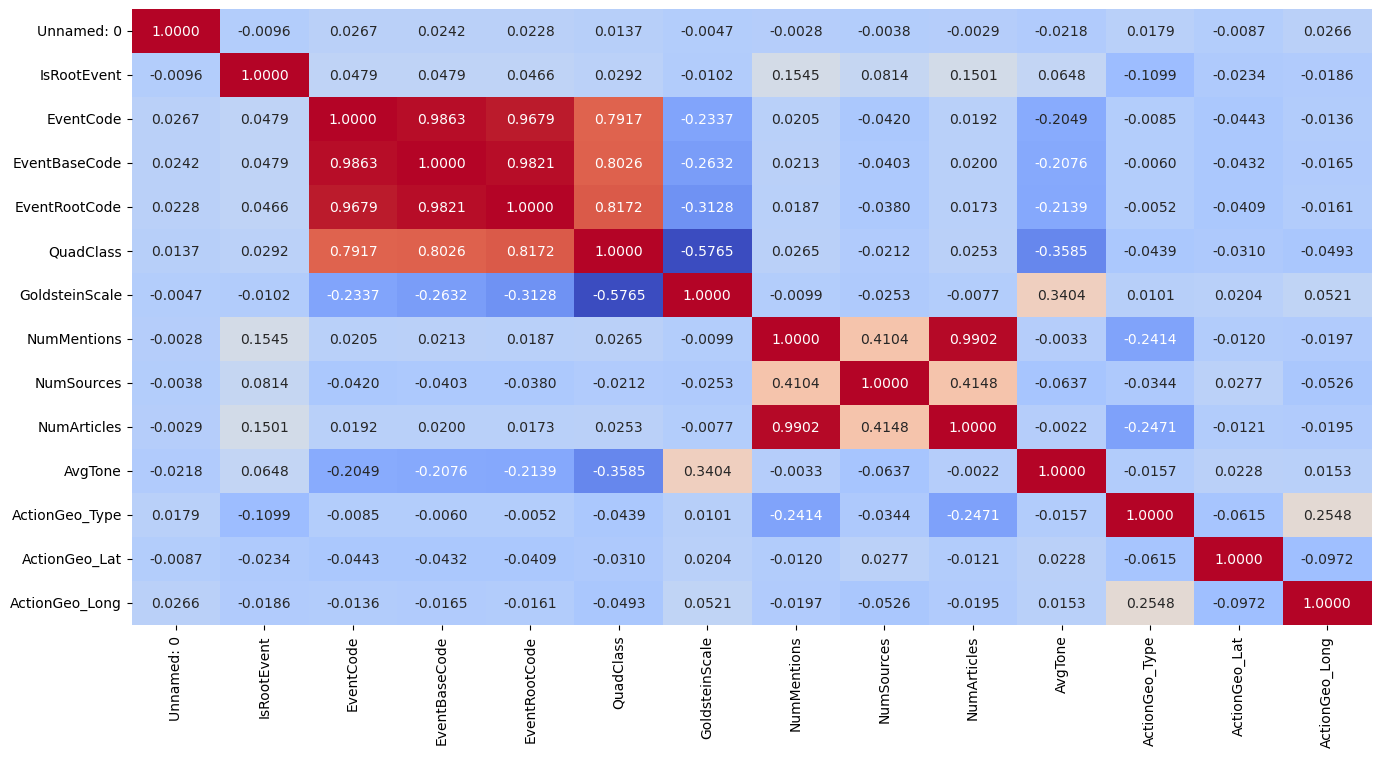

In [27]:
import seaborn as sns
sdf=giorgio[giorgio.index.isin(a.index)]
fig, ax = plt.subplots(figsize = (16,8))
sns.heatmap(sdf.corr(method='spearman'), annot=True, fmt='.4f', 
            cmap=plt.get_cmap('coolwarm'), cbar=False, ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), rotation="horizontal")
plt.savefig('result.png', bbox_inches='tight', pad_inches=0.0)

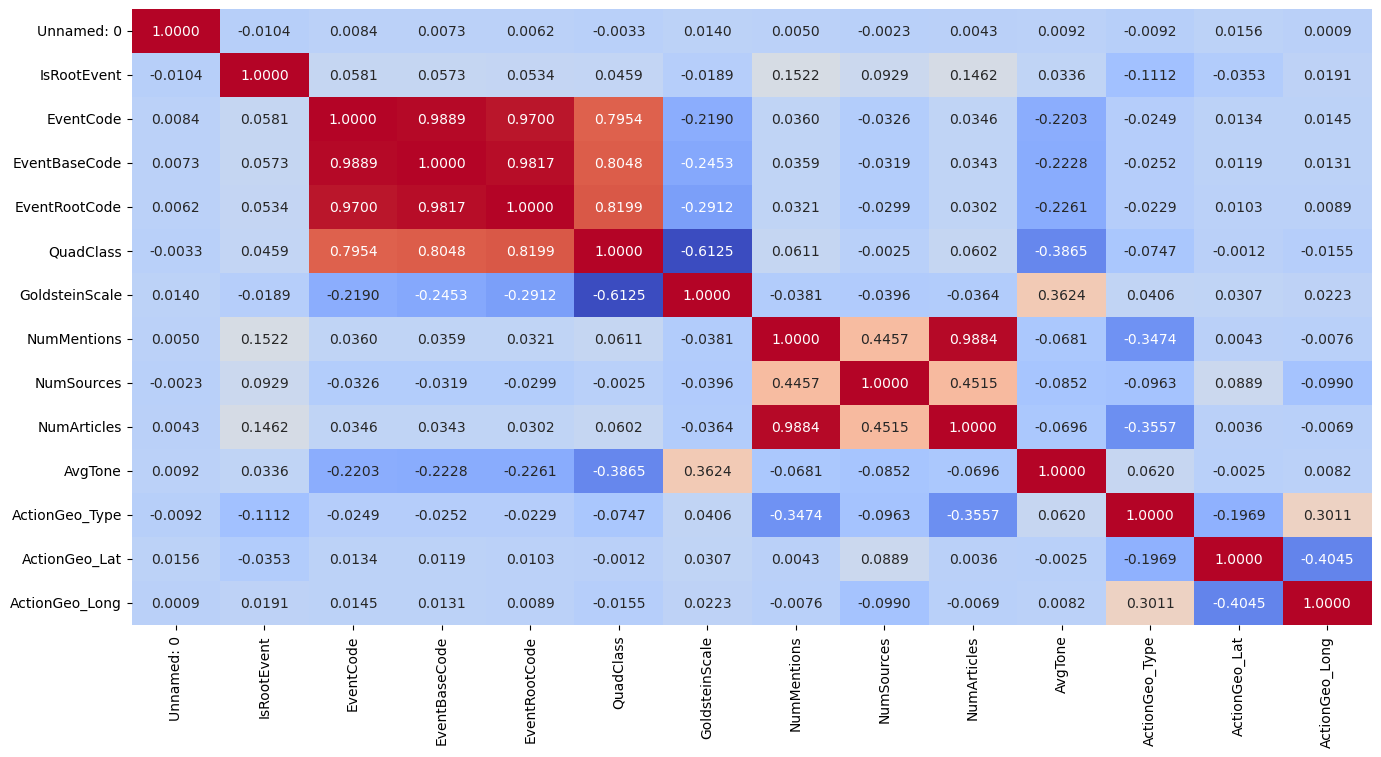

In [30]:
import seaborn as sns
sdf=giorgio[giorgio.index.isin(c.index)]
fig, ax = plt.subplots(figsize = (16,8))
sns.heatmap(sdf.corr(method='spearman'), annot=True, fmt='.4f', 
            cmap=plt.get_cmap('coolwarm'), cbar=False, ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), rotation="horizontal")
plt.savefig('result.png', bbox_inches='tight', pad_inches=0.0)

In [21]:
giorgio[giorgio.index.isin(c.index)].corr()

Unnamed: 0  IsRootEvent  EventCode  EventBaseCode  \
Unnamed: 0        1.000000    -0.002337   0.000958       0.006073   
IsRootEvent      -0.002337     1.000000   0.023488       0.035374   
EventCode         0.000958     0.023488   1.000000       0.501150   
EventBaseCode     0.006073     0.035374   0.501150       1.000000   
EventRootCode     0.006192     0.034311   0.497544       0.999389   
QuadClass         0.002816     0.025824   0.486777       0.970255   
GoldsteinScale   -0.004162    -0.019637  -0.290677      -0.756184   
NumMentions      -0.017877     0.113725  -0.004167      -0.004622   
NumSources       -0.019024     0.055947  -0.021274      -0.036997   
NumArticles      -0.019553     0.110405  -0.006175      -0.009745   
AvgTone           0.004243     0.039508  -0.185854      -0.360764   
ActionGeo_Type   -0.002547    -0.124694  -0.030272      -0.029740   
ActionGeo_Lat    -0.036216    -0.031918   0.009191       0.006384   
ActionGeo_Long    0.043405    -0.011208  -0.026598      -0.065346   

                EventRootCode  QuadClass  GoldsteinScale  NumMentions  \
Unnamed: 0           0.006192   0.002816       -0.004162    -0.017877   
IsRootEvent          0.034311   0.025824       -0.019637     0.113725   
EventCode            0.497544   0.486777       -0.290677    -0.004167   
EventBaseCode        0.999389   0.970255       -0.756184    -0.004622   
EventRootCode        1.000000   0.972064       -0.765003    -0.003742   
QuadClass            0.972064   1.000000       -0.788931     0.001112   
GoldsteinScale      -0.765003  -0.788931        1.000000    -0.016922   
NumMentions         -0.003742   0.001112       -0.016922     1.000000   
NumSources          -0.035514  -0.028501       -0.011756     0.710506   
NumArticles         -0.008836  -0.003363       -0.013091     0.960335   
AvgTone             -0.362009  -0.396850        0.374622    -0.036090   
ActionGeo_Type      -0.030246  -0.047430        0.015983    -0.149552   
ActionGeo_Lat        0.006678   0.012923       -0.006548     0.003878   
ActionGeo_Long      -0.067762  -0.086614        0.086857    -0.025302   

                NumSources  NumArticles   AvgTone  ActionGeo_Type  \
Unnamed: 0       -0.019024    -0.019553  0.004243       -0.002547   
IsRootEvent       0.055947     0.110405  0.039508       -0.124694   
EventCode        -0.021274    -0.006175 -0.185854       -0.030272   
EventBaseCode    -0.036997    -0.009745 -0.360764       -0.029740   
EventRootCode    -0.035514    -0.008836 -0.362009       -0.030246   
QuadClass        -0.028501    -0.003363 -0.396850       -0.047430   
GoldsteinScale   -0.011756    -0.013091  0.374622        0.015983   
NumMentions       0.710506     0.960335 -0.036090       -0.149552   
NumSources        1.000000     0.743874 -0.037730        0.000488   
NumArticles       0.743874     1.000000 -0.035603       -0.153358   
AvgTone          -0.037730    -0.035603  1.000000        0.035102   
ActionGeo_Type    0.000488    -0.153358  0.035102        1.000000   
ActionGeo_Lat     0.031502     0.003947 -0.031890       -0.048953   
ActionGeo_Long   -0.058972    -0.028574  0.070843        0.208453   

                ActionGeo_Lat  ActionGeo_Long  
Unnamed: 0          -0.036216        0.043405  
IsRootEvent         -0.031918       -0.011208  
EventCode            0.009191       -0.026598  
EventBaseCode        0.006384       -0.065346  
EventRootCode        0.006678       -0.067762  
QuadClass            0.012923       -0.086614  
GoldsteinScale      -0.006548        0.086857  
NumMentions          0.003878       -0.025302  
NumSources           0.031502       -0.058972  
NumArticles          0.003947       -0.028574  
AvgTone             -0.031890        0.070843  
ActionGeo_Type      -0.048953        0.208453  
ActionGeo_Lat        1.000000       -0.376220  
ActionGeo_Long      -0.376220        1.000000

# Other Stuff 

In [161]:
degree_hist = mentions['MentionSourceName'].value_counts().to_numpy()

Text(0, 0.5, 'Density')

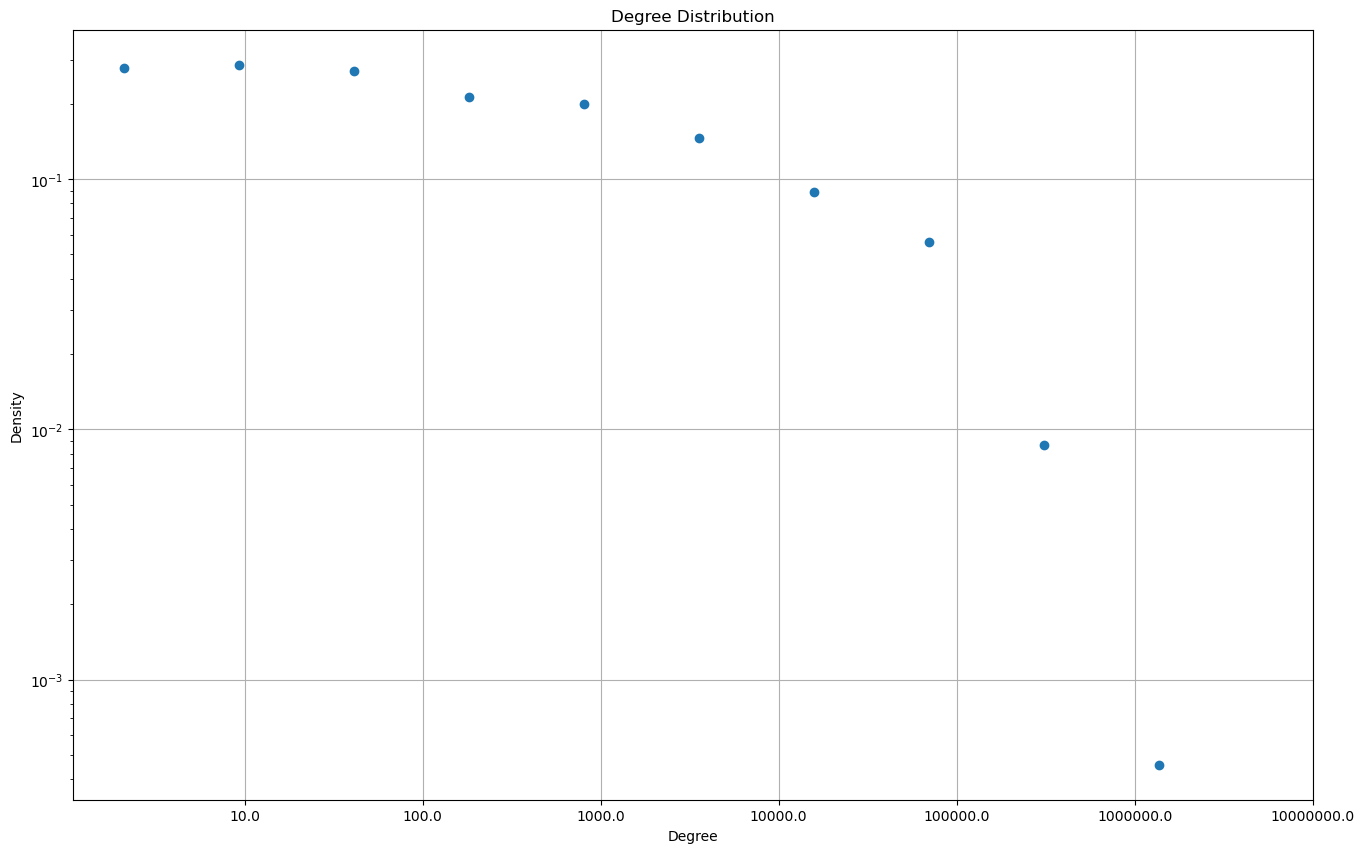

In [162]:
#Average degree of the network 
avg_degree = np.mean(degree_hist)
avg_degree2 = np.mean(degree_hist**2)
log_degree = np.log10(degree_hist)
y,x = np.histogram(log_degree, density = True, bins = 10)
x = (x[:-1] + x[1:])/2

fig = plt.figure("Degree of Edges-6", figsize=(16, 10))
ax2 = fig.add_subplot()
ax2.scatter(x, y)
ax2.set_yscale('log')
xt = ax2.get_xticks()
xt = xt[xt>0]
xt = 10**(xt)
xt = np.round(xt)
ax2.set_xticks(np.log10(xt), labels = xt)
ax2.grid()
ax2.set_title("Degree Distribution")
ax2.set_xlabel("Degree")
ax2.set_ylabel("Density")

# Cascade 

In [88]:
def download_file(timestamp, export = True, mention = True):
    # download and preprocess data starting from the timestamp
    # timestamp: str

    # get the url
    url_mentions, url_export = string_to_url(timestamp)

    # instantiate the connection
    resp_mentions = urlopen(url_mentions)
    resp_export = urlopen(url_export)


    # download the files and instantiate the unzipper
    zipfile_mentions = ZipFile(BytesIO(resp_mentions.read()))
    zipfile_export = ZipFile(BytesIO(resp_export.read()))

    if mention:
        zipfile_mentions.extractall('../temp')
    if export:
        zipfile_export.extractall('../temp')

    # close the unzipper instances
    zipfile_mentions.close()
    zipfile_export.close()

    return

In [8]:
def get_url(eventId, timestamp):
    # get the url
    _, url_export = string_to_url(timestamp)
    
    resp_export = urlopen(url_export)
    
    full_event_header = load_pickle('../data_utils/full_event_header.pickle')
    full_mention_header = load_pickle('../data_utils/full_mention_header.pickle')
    
    # download the files and instantiate the unzipper
    zipfile_export = ZipFile(BytesIO(resp_export.read()))
    
    # unzip and preprocess
    new_dict = full_event_header.copy()
    new_dict['Actor1Geo_Lat'] = 'unicode'
    new_dict['Actor2Geo_Lat'] = 'unicode'
    new_dict['ActionGeo_Lat'] = 'unicode'
    new_dict['Actor1Geo_Long'] = 'unicode'
    new_dict['Actor2Geo_Long'] = 'unicode'
    new_dict['ActionGeo_Long'] = 'unicode'
    export = pd.read_csv(zipfile_export.open(zipfile_export.namelist()[0]), sep = '\t', names = full_event_header.keys(), dtype = new_dict)
    export['ActionGeo_Lat'] = export['ActionGeo_Lat'].str.replace('#','').astype('float32')
    export['ActionGeo_Long'] = export['ActionGeo_Long'].str.replace('#','').astype('float32')
    export.set_index("GlobalEventID", inplace=True)
        
    # close the unzipper instances
    zipfile_export.close()
    
    return(export.loc[eventId]['SOURCEURL'])

In [141]:
def build_time_series(eventId, mentions, days = 0, hours = 0, minutes = 15, max_range = pd.Timedelta(days = 1)):
    
    # select event mentions
    time_series = mentions.loc[eventId].sort_values('MentionTimeDate')[['MentionTimeDate', 'MentionSourceName']]
    
    # cut non interesting mentions
    first_date = time_series['MentionTimeDate'].iloc[0]
    time_series = time_series.loc[time_series['MentionTimeDate']<first_date+max_range]
    
    # count the mentions per timestamp
    time_series = time_series.groupby('MentionTimeDate')['MentionSourceName'].count()
    
    # add final range value if not present
    # to be able to resample in the correct range
    if first_date+max_range-pd.Timedelta(days = days, hours = hours, minutes = minutes) not in time_series:
        time_series[first_date+max_range-pd.Timedelta(days = days, hours = hours, minutes = minutes)] = 0
    
    # resample the series with the desired frequency
    time_series = time_series.resample(pd.Timedelta(days = days, hours = hours, minutes = minutes)).sum()
    
    return(time_series)

In [9]:
get_url(747766982, '20180415113000')

'http://www.btvi.in/article/read/industry/66973/banks-hesitant-to-lend-for-affordable-houses-despite-infra-status'

In [138]:
def add_flow(eventId, G):
    flow = reduced_mentions.loc[eventId].sort_values('MentionTimeDate')[['MentionTimeDate', 'MentionSourceName']]
    flow = flow.set_index('MentionTimeDate')
    t2 = flow.groupby(level = 0)['MentionSourceName'].apply(list)
    for i in range(len(t2)-1):
        all_couples = product(t2[i], t2[i+1])
        G.add_edges_from(zip(all_couples, [1]*len(all_couples)))
    return

In [56]:
eventId = 1022989215

In [114]:
G = nx.DiGraph()
G.add_nodes_from(reduced_mentions['MentionSourceName'].unique())

In [122]:
events.loc[eventId]

DATEADDED   2022-01-13
Name: 1022989215, dtype: datetime64[ns]

In [ ]:
G.edges

In [72]:

flow.MentionTimeDate.iloc[0]

Timestamp('2022-01-13 00:00:00')

In [ ]:

flow.iloc[flow.MentionTimeDate<flow.MentionTimeDate.iloc[0]+pd.Timedelta(minutes = 120)]

In [165]:
eventId = [1022989215,1023873522,1027882173,1024832077,1022989130,1028009242,1022499775,1023333585,1027879313,1027879316, 1027701550, 1024515460, 1023869983, 1025804298, 1024088644, 1025158410, 1021420664, 1022406279, 1027352862, 1027879702]

In [144]:
build_time_series(1022989215, reduced_mentions, days = 0, hours = 0, minutes = 15).to_numpy()

array([ 3,  6, 10,  4,  6,  6,  5, 21,  4,  0,  4,  6,  3,  4,  2, 22,  8,
       16, 10, 10,  8,  2,  6, 23, 25, 32, 12, 20, 12,  8, 14,  6,  6,  9,
        6,  2,  4,  2,  6,  4,  4,  0,  2,  1,  4,  1,  2,  2,  2,  2,  0,
        2,  0,  4,  3,  2,  6,  6,  4, 23,  6,  8, 14, 12, 16,  6,  8, 14,
       10,  8, 16, 12,  6, 33, 22, 18, 14, 11,  6, 17,  9, 12, 28, 14,  6,
        2, 12,  6, 11, 22,  5,  8,  6, 13, 19,  8])

In [142]:
build_time_series(1022989130, reduced_mentions, days = 0, hours = 0, minutes = 15).to_numpy()

array([11, 14, 12, 10, 11,  2,  6,  4,  2,  5,  2,  3,  2,  1,  6, 13,  2,
       15,  5, 12, 11,  4,  4, 13, 20, 30, 12, 18,  9,  1, 12,  5, 11, 12,
       12,  2,  0,  7,  9,  7,  9,  3,  2,  3,  4,  4,  4,  3,  1,  2,  1,
        3,  3, 10, 10,  4,  9, 10,  6, 24, 10, 11,  9, 18, 10,  5, 14, 14,
       10,  5,  3,  9,  6,  7,  8,  9, 13,  7,  2,  4,  5,  5,  2,  2,  3,
        4,  0,  4,  4,  7,  4,  8,  3,  4,  4,  4])

[]

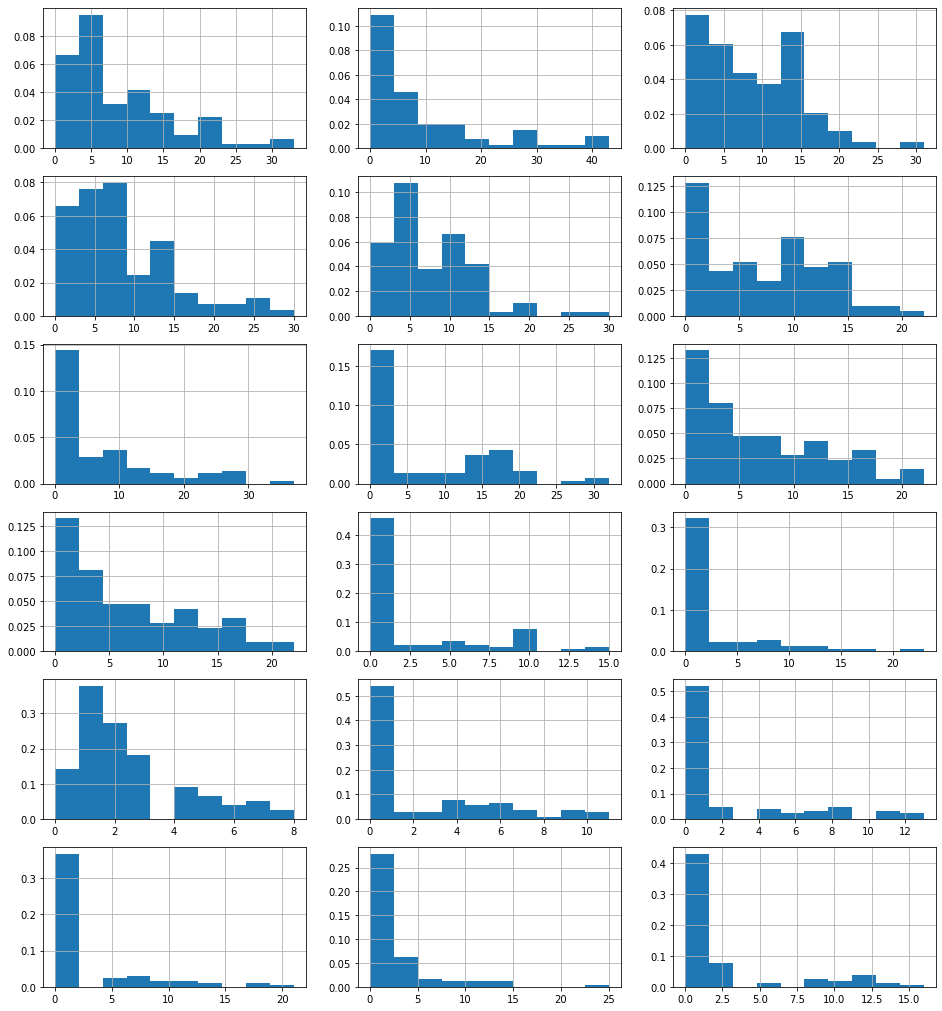

In [168]:
nrow, ncol = (6,3)
fig, axs = plt.subplots(nrow, ncol)
fig.set_size_inches(16, 3*nrow)

for row in range(nrow):
    for col in range(ncol):
        build_time_series(eventId[ncol*row + col], reduced_mentions, days = 0, hours = 0, minutes = 15).hist(ax = axs[row,col], density = True)

plt.plot()